Primero importo las cosas que tengo en mis funciones y el modelo

In [1]:
import sys
sys.path.append("../")
from src.func import *

from keras.models import load_model
model = load_model('my_model.h5')

Ahora he hecho esta función que me mira si hay números o no en las minifotos, con lo que dijimos de la media de los colores   
Si hay número me lo pasa por el modelo y me lo predice

In [56]:
def number_or_not(sudolist):
    numnot = []
    probabilidades = []
    numeromodificado = []
    
    for square in sudolist: 
        
        a = 1.5 # 1.0-3.0
        b = 0 # 0-100
        contrast = cv2.convertScaleAbs(square, alpha=a, beta=b)
        
        cut = crop_and_reshape_numbers (contrast)
        scale = average_pixel_color(cut)
        
        if scale < 9:
            numnot.append(0)
            probabilidades.append(0)
            numeromodificado.append(0)
        else:
            #kernel = np.ones((1,1), np.uint8) 
            #img_erosion = cv2.erode(cut, kernel, iterations=2) 
            #img_dilation = cv2.dilate(cut, kernel, iterations=1)
            
            ksize = (3, 3) 
            blur = cv2.blur(cut, ksize) 
            
            squareform = fig_to_model_format(blur)
            
            res = np.argmax(model.predict(squareform), axis=-1)
            
            numnot.append(res[0])
            probabilidades.append(model.predict(squareform))
            numeromodificado.append(blur)
            
    return numnot, probabilidades, numeromodificado

Al pasar esta imagen me las detecta todas

In [57]:
recortado = sudoku_cut_frame("sudokuwik.png")
lista = sudoku_split_81(recortado)
lista_final, listaprobs, numeros = number_or_not(lista)
print(lista_final[:9])
print(lista_final[9:18])
print(lista_final[18:27])
print(lista_final[27:36])
print(lista_final[36:45])
print(lista_final[45:54])
print(lista_final[54:63])
print(lista_final[63:72])
print(lista_final[72:81])

[5, 3, 0, 0, 7, 0, 0, 0, 0]
[6, 0, 0, 1, 9, 5, 0, 0, 0]
[0, 9, 8, 0, 0, 0, 0, 6, 0]
[8, 0, 0, 0, 6, 0, 0, 0, 3]
[4, 0, 0, 8, 0, 3, 0, 0, 1]
[7, 0, 0, 0, 2, 0, 0, 0, 6]
[0, 6, 0, 0, 0, 0, 2, 8, 0]
[0, 0, 0, 4, 1, 9, 0, 0, 5]
[0, 0, 0, 0, 8, 0, 0, 7, 9]


Sin embargo al hacerlo con este otro me dan mal varios números


In [62]:
recortado = sudoku_cut_frame("Sudoku_5122_easy.jpg")
lista = sudoku_split_81(recortado)
lista_final, listaprobs, numeros = number_or_not(lista)
print(lista_final[:9])
print(lista_final[9:18])
print(lista_final[18:27])
print(lista_final[27:36])
print(lista_final[36:45])
print(lista_final[45:54])
print(lista_final[54:63])
print(lista_final[63:72])
print(lista_final[72:81])

[0, 0, 3, 2, 5, 0, 0, 5, 0]
[0, 4, 0, 7, 0, 0, 2, 0, 5]
[0, 0, 0, 0, 0, 5, 0, 0, 7]
[7, 0, 7, 0, 0, 0, 5, 0, 0]
[0, 0, 0, 5, 0, 8, 7, 0, 0]
[5, 0, 0, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 7, 0, 0, 6]
[0, 7, 0, 1, 0, 0, 7, 0, 9]
[0, 0, 8, 8, 7, 0, 0, 7, 0]


Este 9 te lo pilla como un 5:

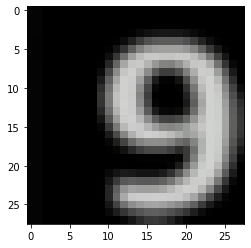

In [63]:
plt.imshow(numeros[7])

Te dice que la probabilidad de ser un 5 es más del 90%

In [73]:
listaprobs[7][0]

array([2.7000902e-03, 1.6772503e-02, 1.1364162e-05, 8.3721476e-03,
       5.1698304e-04, 9.3050748e-01, 8.1241690e-04, 1.2534068e-06,
       3.3837318e-02, 6.4685289e-03], dtype=float32)

Este 1 lo pilla como un 7

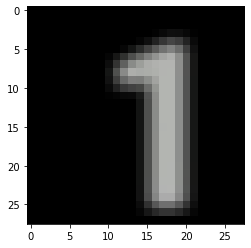

In [27]:
plt.imshow(numeros[12])

Aquí lo mismo, probabilidad de 7 más del 95%

In [28]:
listaprobs[12]

array([[1.2037585e-03, 3.6537983e-02, 5.8393474e-03, 2.0771952e-02,
        5.0900057e-03, 3.6446932e-03, 9.5627882e-05, 8.8807988e-01,
        1.0230684e-02, 2.8506087e-02]], dtype=float32)

Este otro 1 me lo pilla como un 7 también

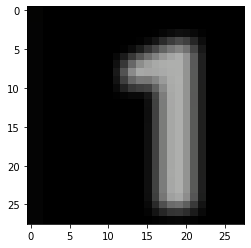

In [9]:
plt.imshow(numeros[26])

La probabilidad de 7 es prácticamente igual en este número 1 que en el anterior

In [10]:
listaprobs[26]

array([[3.7330361e-03, 3.4269854e-02, 9.6895201e-03, 1.8374914e-02,
        1.7136008e-02, 1.1623417e-02, 3.3375248e-04, 8.6703366e-01,
        3.0677554e-03, 3.4738097e-02]], dtype=float32)

Y este 2 por alguna razón también me lo pilla como un 7

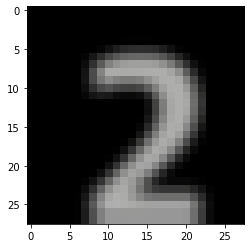

In [11]:
plt.imshow(numeros[29])

In [12]:
listaprobs[29]

array([[8.5579818e-03, 5.7814931e-03, 1.6671641e-01, 2.9910157e-02,
        1.0341756e-03, 4.7168457e-03, 2.6431060e-05, 7.5755197e-01,
        4.3603582e-03, 2.1344159e-02]], dtype=float32)

Con los últimos números pasa igual

Con este otro sudoku lo que pasa es que la resolución no es muy buena, aun así los adivina casi todos:

In [45]:
recortado = sudoku_cut_frame("Sudokufondo.png")
lista = sudoku_split_81(recortado)
lista_final, listaprobs, numeros = number_or_not(lista)
print(lista_final[:9])
print(lista_final[9:18])
print(lista_final[18:27])
print(lista_final[27:36])
print(lista_final[36:45])
print(lista_final[45:54])
print(lista_final[54:63])
print(lista_final[63:72])
print(lista_final[72:81])

[5, 3, 0, 0, 7, 0, 0, 0, 0]
[6, 0, 0, 1, 9, 5, 0, 0, 0]
[0, 9, 8, 0, 0, 0, 0, 6, 0]
[8, 0, 0, 0, 6, 0, 0, 0, 3]
[4, 0, 0, 8, 0, 3, 0, 0, 1]
[3, 0, 0, 0, 2, 0, 0, 0, 6]
[0, 6, 0, 0, 0, 0, 5, 8, 0]
[0, 0, 0, 4, 1, 9, 0, 0, 5]
[0, 0, 0, 0, 8, 0, 0, 3, 9]


Este 7 te lo detecta como un 3

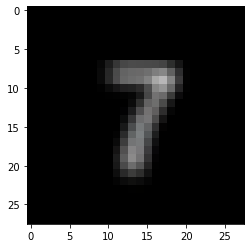

In [46]:
plt.imshow(numeros[45])

Sin embargo fíjate en las probabilidades, está ahí ahí entre un 3 y un 7

In [47]:
listaprobs[45]

array([[0.00449294, 0.07793719, 0.00769765, 0.50771266, 0.00078095,
        0.01232232, 0.00102679, 0.3417103 , 0.01378385, 0.03253531]],
      dtype=float32)

Con este 2 anda un poco más perdido, dice que es un 5

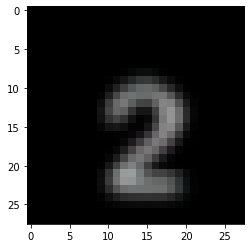

In [16]:
plt.imshow(numeros[60])

In [17]:
listaprobs[60]

array([[0.10161571, 0.10070787, 0.10166477, 0.06673899, 0.0022133 ,
        0.45430946, 0.03240905, 0.06963135, 0.05469985, 0.01600958]],
      dtype=float32)

Con el 7 está también ahí ahí

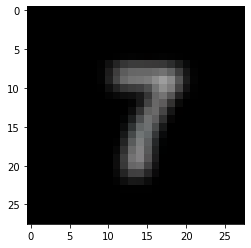

In [18]:
plt.imshow(numeros[79])

In [19]:
listaprobs[79]

array([[0.00517462, 0.06200219, 0.01084697, 0.5751222 , 0.00147132,
        0.01705043, 0.00198334, 0.2751626 , 0.02324721, 0.02793903]],
      dtype=float32)

En el siguiente solo te falla un número, pero aun así se lo está pensando bastante también:

In [20]:
recortado = sudoku_cut_frame("Sudoku2.jpg")
lista = sudoku_split_81(recortado)
lista_final, listaprobs, numeros = number_or_not(lista)
print(lista_final[:9])
print(lista_final[9:18])
print(lista_final[18:27])
print(lista_final[27:36])
print(lista_final[36:45])
print(lista_final[45:54])
print(lista_final[54:63])
print(lista_final[63:72])
print(lista_final[72:81])

[3, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 4]
[0, 4, 0, 0, 5, 0, 0, 0, 0]
[0, 6, 0, 0, 7, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 2, 0]
[0, 8, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 8, 0, 0]


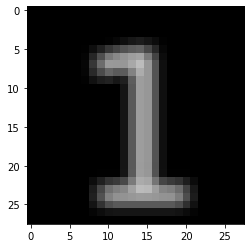

In [21]:
plt.imshow(numeros[0])

Está al 26% ese 1, se lo piensa y casi lo acierta

In [22]:
listaprobs[0]

array([[2.7888336e-03, 2.7916136e-01, 1.4322155e-02, 4.5669508e-01,
        9.2678827e-05, 5.3331205e-03, 2.8804438e-05, 1.2612161e-01,
        4.3590210e-02, 7.1866125e-02]], dtype=float32)